<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0926/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# tensorflow + keras -> tensorflow 2
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


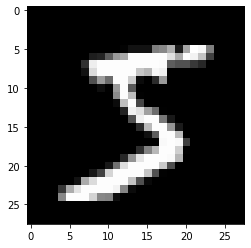

In [19]:
# 只要matplotlib cmap參數: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 反過來: _r inferno -> inferno_r
import pandas as pd
# 0-59999
idx = 0
import matplotlib.pyplot as plt
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [20]:
# tensorflow建立模型需要兩個
# 1. 地基(Model): Sequential(一層一層), Model(自由) 
# 2. 一層層(Layer): Dense(稠密層/全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 互斥: 比較傾向softmax(normalize sigmoid)
    # 不互斥: sigmoid
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
# mse: 可以, 但訓練起來(loss min)很花時間, 
# 回歸時候使用可以, 分類太花時間
# 分類: loss -> Cross Entropy
# 如果最後只有一個神經元輸出(sigmoid激活): BinaryCrossEntropy
# p log1/q + (1-p) log(1/1-q)
# 如果最後是多個神經元輸出(softmax激活): CategoricalCrossEntropy
# p1 log1/q1 + p2 log1/q2
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [22]:
# One-Hot
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
import numpy as np
a = np.array([1, 2, 3, 4, 5, 6])
# a.reshape(2, -1)
a.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
# 攤平(28x28->784) -> Scaling(/255.0)
# tensorflow要求: 輸入 1. 0-1  2. -1-1
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [25]:
# batch: 爽就好, 圖片小: 100筆一次 圖片大:20比一次
# 60000筆: 54000筆(訓練) / 100 = 540次細數調整
# epochs: 54000筆 要看 幾遍 -> 什麼時候要停(不要過擬和, val_loss平滑就停)
# epochs=10, 540次 * 10(epoch) -> 5400次
# verbose: log印多少 預設1:進度條  0:無聲  2:除了進度條都有
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
cs = [
    # 存檔
    ModelCheckpoint("mnist.h5", save_best_only=True),
    # 提早停止
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     callbacks=cs,
     verbose=2)

Epoch 1/30
540/540 - 1s - loss: 0.3550 - accuracy: 0.9019 - val_loss: 0.1690 - val_accuracy: 0.9548 - 1s/epoch - 3ms/step
Epoch 2/30
540/540 - 1s - loss: 0.1670 - accuracy: 0.9524 - val_loss: 0.1204 - val_accuracy: 0.9680 - 1s/epoch - 2ms/step
Epoch 3/30
540/540 - 1s - loss: 0.1182 - accuracy: 0.9661 - val_loss: 0.1002 - val_accuracy: 0.9715 - 1s/epoch - 2ms/step
Epoch 4/30
540/540 - 1s - loss: 0.0925 - accuracy: 0.9727 - val_loss: 0.0925 - val_accuracy: 0.9740 - 1s/epoch - 2ms/step
Epoch 5/30
540/540 - 1s - loss: 0.0728 - accuracy: 0.9787 - val_loss: 0.0876 - val_accuracy: 0.9740 - 1s/epoch - 2ms/step
Epoch 6/30
540/540 - 1s - loss: 0.0594 - accuracy: 0.9829 - val_loss: 0.0794 - val_accuracy: 0.9777 - 1s/epoch - 2ms/step
Epoch 7/30
540/540 - 1s - loss: 0.0487 - accuracy: 0.9864 - val_loss: 0.0806 - val_accuracy: 0.9772 - 1s/epoch - 2ms/step
Epoch 8/30
540/540 - 1s - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.0770 - val_accuracy: 0.9778 - 1s/epoch - 3ms/step
Epoch 9/30
540/540 - 1s 

In [26]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9777


[0.07651879638433456, 0.9776999950408936]

In [34]:
pre = model.predict(x_test_norm).argmax(axis=-1)
pre

313/313 [==============================] - 0s 951us/step


array([7, 2, 1, ..., 4, 5, 6])

In [33]:
# 不帶, axis=0, axis=1(axis=-1)
np.array([
    [100, 200, 300],
    [400, 500, 600]
]).argmax(axis=1)

array([2, 2])

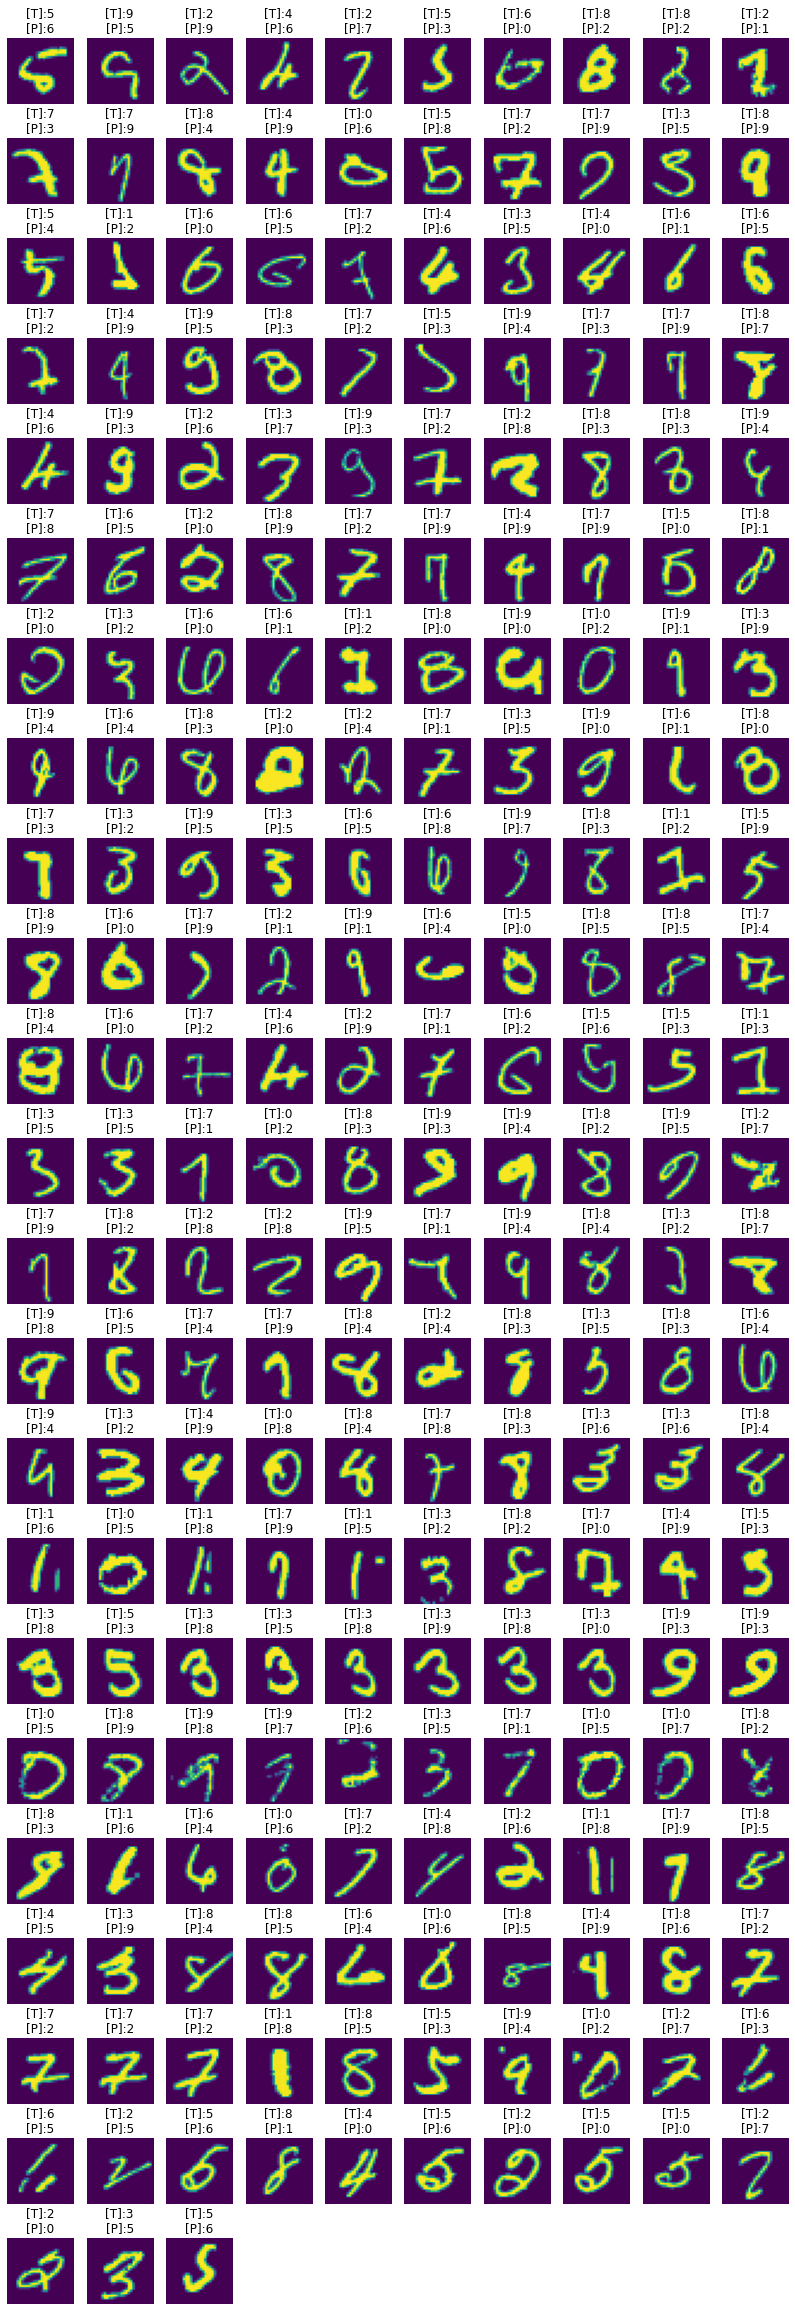

In [43]:
import matplotlib.pyplot as plt
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(false_true[i],
                   false_pre[i])
    plt.axis("off")
    plt.title(t)
    plt.imshow(false_img[i])

In [39]:
# demo nonzero
a = np.array([
    [0, 2],
    [0, 3]
])
np.nonzero(a)

(array([0, 1]), array([1, 1]))